# Skillfactory. Курс "Специализация Data Science"
## Дипломный проект. Учебный кейс «Модель прогнозирования стоимости жилья для агентства недвижимости»

**Описание задачи:**

Агентство недвижимости столкнулось с проблемой — риелторы тратят слишком много времени на сортировку объявлений и поиск выгодных предложений. Поэтому скорость их реакции и качество анализа не дотягивают до уровня конкурентов. Это сказывается на финансовых показателях агентства. Задача - разработать модель машинного обучения, которая поможет обрабатывать объявления и увеличит число сделок и прибыль агентства.

**Файлы для работы:**

- data.csv - датасет с данными об объектах недвижимости

**Этапы проекта:**

- Провести разведывательный анализ и очистку исходных данных. Необходимо отыскать закономерности, расшифровать сокращения, найти синонимы в данных, обработать пропуски и удалить выбросы.
-  Выделить наиболее значимые факторы, влияющие на стоимость недвижимости.
-  Построить модель для прогнозирования стоимости недвижимости.
-  Разработать небольшой веб-сервис, на вход которому поступают данные о некоторой выставленной на продажу недвижимости, а сервис прогнозирует его стоимость.

**Описание признаков в исходном наборе данных:**
- 'status' — статус продажи
- 'private pool' и 'PrivatePool' — наличие собственного бассейна
- 'propertyType' — тип объекта недвижимости
- 'street' — адрес объекта
- 'baths' — количество ванных комнат
- 'homeFacts' — сведения о строительстве объекта (содержит несколько типов сведений, влияющих на оценку объекта)
- 'fireplace' — наличие камина
- 'city' — город
- 'schools' — сведения о школах в районе
- 'sqft' — площадь в футах
- 'zipcode' — почтовый индекс
- 'beds' — количество спален
- 'state' — штат
- 'stories' — количество этажей
- 'mls-id' и 'MlsId' — идентификатор MLS (Multiple Listing Service, система мультилистинга)
_____________________________
- **'target'** — цена объекта недвижимости (целевой признак, который необходимо спрогнозировать)


In [1]:
import numpy as np 
import pandas as pd

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 

# модуль для работы с регулярными выражениями
import re

# библиотека отчетов для EDA
import sweetviz as sv

### 1. Исследование структуры, обработка и очистка данных

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


In [3]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

None

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103115,377151,377185,336608,377185,285903,377185,226470,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1653,2026,297365,25405,4549,1184,39,348,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


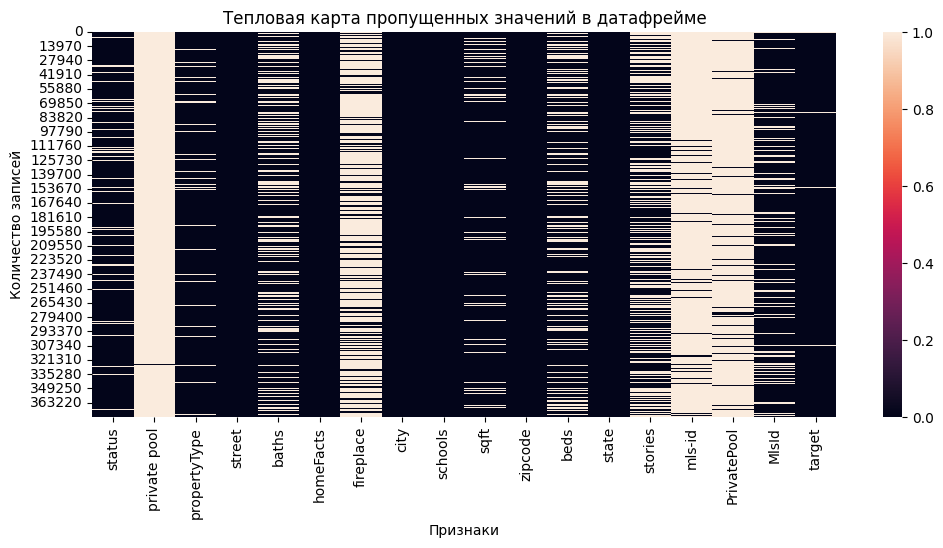

In [4]:
# Визуализация тепловой карты пропущенных значений в датафрейме
plt.figure(figsize = (12,5))
heatmap = sns.heatmap(data = df.isnull())

heatmap.set_title('Тепловая карта пропущенных значений в датафрейме');
heatmap.set_xlabel('Признаки');
heatmap.set_ylabel('Количество записей');

In [5]:
# Поиск и удаление полных дубликатов
mask = df.duplicated()
df_duplicates = df[mask]
display(f"Количество полных дубликтов в таблице составляет: {df_duplicates.shape[0]}")
df.drop_duplicates(inplace=True)
df.shape

'Количество полных дубликтов в таблице составляет: 50'

(377135, 18)

In [6]:
# Определение % пропусков в данных
df.isnull().mean() * 100

status          10.584274
private pool    98.891378
propertyType     9.209699
street           0.000530
baths           28.188315
homeFacts        0.000000
fireplace       72.659127
city             0.009015
schools          0.000000
sqft            10.752118
zipcode          0.000000
beds            24.196640
state            0.000000
stories         39.952007
mls-id          93.386453
PrivatePool     89.311520
MlsId           17.730786
target           0.657589
dtype: float64

В целевом признаке **'target'** содержатся пропуски. Эти данные непригодны для обучения модели, следовательно от них можно избавится.

In [7]:
# Удаление строк с пропусками в целевом признаке
df.dropna(axis=0, subset='target', inplace=True)
df.shape

(374655, 18)

Проведем осмотр набора данных с помощью библиотеки Sweetviz с целью дальнейшего преобразования признаков

In [ ]:
report = sv.analyze(df)
report.show_notebook()
# report.show_html()

![](images/sweetviz.png?raw=true)

Признаки **'mls-id'** и **'MlsId'** содержат уникальные номера идентификаторов системы мультилистинга, а также адреса (которые есть в других признаках). Учитывая большой % пропусков в 'mls-id' и большое количество уникальных значений в 'MlsId', можно считать эти признаки малоинформативными и удалить их из набора данных.

In [9]:
df.drop(['mls-id', 'MlsId'], axis=1, inplace=True)
df.shape

(374655, 16)

Признаки **'private pool'** и **'PrivatePool'** указывают на наличие бассейна и следовательно могут быть объеденены. Большое количество пропусков в данном случае свидетельствует о том, что заполняются данные только о наличии бассейна, в то время как пропуски можно считать за отсутствие бассейна. Данные признаки можно использовать для нашей задачи, т.к. наличие бассейна может влиять на стоимость недвижимости.

In [10]:
# Объединяем столбцы
df['private_pool_bool'] = df['private pool'].combine_first(df['PrivatePool'])

# Пропуски заменяем на False
df['private_pool_bool'] = df['private_pool_bool'].fillna(False)

# Значения 'yes'/'Yes' заменяем на True
df['private_pool_bool'] = df['private_pool_bool'].replace(['yes', 'Yes'], True)

# Удаляем обработанные столбцы
df.drop(['private pool', 'PrivatePool'], axis=1, inplace=True)

# Выводим уникальные значения в новом столбце
display(df['private_pool_bool'].unique())
df.shape

array([False,  True])

(374655, 15)

Признак **'fireplace'** содержит большое количество пропусков, однако его можно использовать для решения нашей задачи, т.к. наличие камина может влиять на стоимость недвижимости. Пропуски будем считать за отсутствие камина.

In [11]:
# Заменяем значения столбца на True/False
df['fireplace_bool'] = df['fireplace'].apply(lambda x: True if str(x).lower() not in ['', '0', 'not applicable', 'no', 'not', 'none'] and not pd.isna(x) else False)

# Удаляем обработанный столбец
df.drop('fireplace', axis=1, inplace=True)

# Выводим уникальные значения в новом столбце
display(df['fireplace_bool'].unique())
df.shape


array([ True, False])

(374655, 15)

Признак **'status'** содержит 156 уникальных значений. Уменьшим их количество, объединив в группы по смысловой нагрузке. Пороговым значением для создания группы будем считать 1% от набора данных. Остальным значениям статуса, а также пустым значениям присвоим категорию "Other".

In [12]:
# Выделим основные категории, которые имеют долю свыше 1%
status = df['status'].value_counts(normalize=True)*100
display(round(status[status > 1],2))

for sale            46.53
Active              31.37
For sale            12.96
foreclosure          1.69
New construction     1.63
Pending              1.40
Name: status, dtype: float64

In [13]:
# Создание словаря с категориями
status_dict = {
    "For Sale": ["for sale", "For sale"],
    "Active": [
        "Active", "A Active", "Active/Contingent", "Active Under Contract", "Active Option", "Auction - Active",
        "Active With Contingencies", "Active Option Contract", "Active Contingency", "Active Backup",
        "Active Contingent", "Active - Auction", "Active With Offer", "Active - Contingent", "Active with Contract",
        "Temporary Active", "Re Activated", "Reactivated"
    ],
    "Foreclosure": [
        "Pre-foreclosure", "Pre-foreclosure / auction", " / auction", "Foreclosed", "foreclosure", "Foreclosure", 
        "Contingent   Foreclosure"
    ],
    "New construction": [
        "New construction", "New", "Coming soon: Nov 21.", "Coming soon: Dec 4.", "Coming soon: Nov 23.",
        "Coming soon: Dec 2.", "Coming soon: Dec 10.", "Coming soon: Dec 24.", "Coming soon: Nov 14.",
        "Coming soon: Nov 22.", "Coming soon: Oct 21.", "Coming soon: Dec 14.", "Coming soon: Oct 24.",
        "Coming soon: Dec 18.", "Coming soon: Dec 16.", "Coming soon: Dec 3.", "Coming soon: Dec 25.",
        "Coming soon: Nov 11.", "Coming soon: Nov 28.", "Coming soon: Nov 17.", "Coming soon: Dec 6.",
        "Coming soon: Nov 27.", "Coming soon: Nov 26.", "Coming soon: Dec 7.", "Coming soon: Dec 27.",
        "Coming soon: Dec 11.", "Coming soon: Dec 5.", "Coming soon: Nov 13.", "Coming soon: Nov 19.",
        "Coming soon: Nov 8.", "Coming soon: Oct 29.", "Coming soon: Dec 15.", "Coming soon: Oct 30.",
        "Coming soon: Dec 9.", "Coming soon: Dec 20.", "Coming soon: Dec 13.", "Coming soon: Dec 23.",
        "Coming soon: Nov 30.", "Coming soon: Dec 1.", "Coming soon: Nov 5.", "Coming soon: Nov 12.",
        "Coming soon: Nov 25.", "Coming soon: Nov 9.", "Coming soon: Nov 29."
    ],
    "Pending": [
        "P", "Pending", "pending", "P Pending Sale", "Pending Ab", "Pending Continue To Show",
        "Pending Inspection", "Pending Offer Approval", "Pending In", "Pending W/Insp Finance", "Pending Fe",
        "Pending W/Backup Wanted", "Pending Backups Wanted", "Pending With Contingencies", "Lease/Purchase Pending",
        "Pending Bring Backup", "Pending - Taking Backups", "Pending - Continue to Show",
        "Pending Taking Backups", "Offer Pending Signature", "Pending (Do Not Show)", "Pending W/ Cont.",
        "Pending W/Escape Clause", "Pending - Backup Offer Requested", "Pending Sale"
    ]
}

# Функция изменения категории
def change_category(current_category):
    for category, item in status_dict.items():
        if current_category in item:
            return category
    return "Other"

# Изменение категории статуса в датафрейме
df['status'] = df['status'].apply(change_category)

In [14]:
# Проверка изменений
display(f"Количество уникальных категорий: {df['status'].nunique()}")
display(round(df['status'].value_counts(normalize=True)*100, 2))

'Количество уникальных категорий: 6'

For Sale            53.25
Active              28.44
Other               12.06
Foreclosure          2.77
Pending              1.80
New construction     1.67
Name: status, dtype: float64

Признак **'propertyType'** содержит 1279 уникальных значений. Уменьшим их количество, объединив в группы по смысловой нагрузке. Пороговым значением для создания группы будем считать 1% от набора данных. Остальным значениям статуса, а также пустым значениям присвоим категорию "Other".

In [15]:
# Выделим основные категории, которые имеют долю свыше 1%
propertyType = df['propertyType'].value_counts(normalize=True)*100
display(round(propertyType[propertyType >= 1],2))
display(df['propertyType'].value_counts()[:12])

single-family home               26.87
Single Family                    18.20
Single Family Home                9.33
condo                             7.61
lot/land                          6.03
Condo                             4.85
townhouse                         3.36
Land                              3.21
multi-family                      2.32
Condo/Townhome/Row Home/Co-Op     2.26
Townhouse                         2.03
Traditional                       1.74
Name: propertyType, dtype: float64

single-family home               91370
Single Family                    61886
Single Family Home               31725
condo                            25874
lot/land                         20506
Condo                            16494
townhouse                        11435
Land                             10933
multi-family                      7874
Condo/Townhome/Row Home/Co-Op     7701
Townhouse                         6909
Traditional                       5912
Name: propertyType, dtype: int64

In [16]:
# Приведение значений к строчному виду
df['propertyType'] = df['propertyType'].str.lower()

# Создание словаря с категориями
propertyType_dict = {
    "Single Family Home": [
        'single-family home', 'single family home', 'single family', 'singlefamilyresidence', '1 story',
        '1 story, contemporary', '1 story, other (see remarks)', 'single wide mh'
        'one story traditional', '1 story traditional', 'detached, one story',
        'single detached', 'single wide', 'single-wide mobile with land',
        '1 story,traditional', '1 story, historic/older, traditional', '1 story, split level', 
        'single detached, french', '1 story, traditional', 'single detached, traditional',
        'one story', 'one level unit', '1 1/2 story'      
    ],
    "Condo": [
        'condo', 'condo/unit', 'apartment/condo/townhouse', 'co-op', '2 story condo', 'high rise',
        'coop', 'cooperative', 'condo/townhome/row home/co-op', 'condo/townhome','condominium',
        'condo/townhome, hi-rise, contemporary/modern, loft', 'condo, other (see remarks)',
        '2 unit condo', 'condo/townhome, contemporary/modern, loft, traditional', 'apartment',
        'condo/townhome, hi-rise, resort property, vacation home, contemporary/modern',
        'condo/townhome, other (see remarks)', 'condo/townhome, french', 'condo/townhome, craftsman, traditional',
        'condominium (single level)', 'high-rise', 'mid-rise', 'low-rise (1-3 stories)', 'Flats', 'studio'     
    ],
    "Land": ['lot/land', 'land'],
    "Townhouse": [
        'townhouse', 'townhome', 'townhome style', 'townhouse-interior', 'townhouse-end unit',
        'townhouse, attached/row', 'townhouse, northwestern contemporary', 'attached, townhouse',
        'townhouse, 2-story', 'townhouse, two story, traditional', 'townhouse, villa'    
    ],
    "Multi Family Home": [
        'multi-family', 'multi-family home', 'multi family', 'duplex', 'triplex', 'fourplex',
        '2 stories', 'multi_level', '2-story', 'two story', 'multi-level, modern',
        'detached, two story', '2 story, other (see remarks)', 'multiple occupancy'   
    ],
    "Traditional": [
        'traditional', 'ranch', 'bungalow', 'farms/ranches', 'colonial', 'attached or 1/2 duplex, traditional',
        'designated historical home', 'historical/conservation district', 'historic/older',
        'historic vintage', 'historic', '1 story, historic/older, craftsman',
        'historical/conservation district, single detached, contemporary/modern, traditional',
        '1 story, historic/older, traditional, craftsman', 'historical, traditional',
        '2 stories, historic/older, craftsman', 'traditional, transitional',
        'rancher', '1 story/ranch', '1 story, ranch', 'rancher, raised ranch', 'farms/ranches',
        'hi ranch', 'ranch, one story', 'ranch, traditional', 'farm house', 'garden home',
        'ranch, one story, duplex', 'farm house', 'ranch, transitional', '2 stories, traditional',
        'bungalow, contemporary, ranch, traditional', '1 story, ranch, traditional, texas hill country',
        '1 story, contemporary, ranch, historic/older, traditional', 'farm house, transitional',
        'ranch, traditional, transitional', 'old world, ranch', 'ranch, split level', 
        'ranch, spanish', 'farm/ranch house, single detached, contemporary/modern, ranch',
        '2 stories, colonial, ranch', '1 story, ranch, craftsman', 'raised ranch, rancher'
    ]
}

# Функция изменения категории
def change_category(current_category):
    for category, item in propertyType_dict.items():
        if current_category in item:
            return category
    return "Other"

# Изменение категории статуса в датафрейме
df['propertyType'] = df['propertyType'].apply(change_category)

In [17]:
# Проверка изменений
display(f"Количество уникальных категорий: {df['propertyType'].nunique()}")
display(round(df['propertyType'].value_counts(normalize=True)*100, 2))
display(df['propertyType'].value_counts())

'Количество уникальных категорий: 7'

Single Family Home    51.07
Condo                 15.24
Other                 13.68
Land                   8.39
Townhouse              4.90
Multi Family Home      3.82
Traditional            2.89
Name: propertyType, dtype: float64

Single Family Home    191321
Condo                  57096
Other                  51267
Land                   31439
Townhouse              18374
Multi Family Home      14325
Traditional            10833
Name: propertyType, dtype: int64

Признак **'street'** содержит 89% уникальных значений, кроме того наиболее распространенными являются записи без указания улиц. Извлечь полезную информацию для модели из данного признака представляется проблематичным. Для определения географического положения недвижимости будут использованы принаки 'city', 'state'. Признак 'street' подлежит удалению.

In [18]:
# Удаляем неиформативный признак
df.drop('street', axis=1, inplace=True)
df.shape

(374655, 14)

Признак **'baths'** содержит 28% пропущенных значений. Будем считать пропуски за отсутствие ванной комнаты (например, для типа недвижимости Land это вполне допустимо). Данные в признаке представлены в виде чисел и строк, необходимо привести данные к целочисленным значениям и избавиться от аномальных значений (сотни и тысячи).

In [19]:
# Удаляем буквы и двоеточия
df['baths'] = df['baths'].str.replace('[a-zA-Z+:]','', regex=True)

# Удаляем пробелы
df['baths'] = df['baths'].str.replace(' ','', regex=True)

display(df['baths'].unique())


array(['3.5', '3', '2', '8', nan, '1,750', '4', '5', '1,000', '7', '2.0',
       '3.0', '1', '4.0', '2.1', '2.5', '4.5', '6', '2,500', '5.5', '1.0',
       '1.5', '~', '4,000', '2,000', '3,000', '8.0', '0', '5.0', '1,500',
       '7.0', '1,250', '9', '2,250', '6.0', '12', '3,500', '2,750', '750',
       '10', '19', '10.0', '7.5', '0/0', '..', '18', '--', '11', '5,000',
       '1.75', '12.0', '6.5', '16', '13', '14', '9.0', '8.5', '1.1', '17',
       '241', '16.0', '10.5', '7,500', '11.0', '20', '40', '1-0/1-0/1',
       '14.0', '2.75', '24', '22.0', '0.00', '2.25', '3.1', '3.25', '—',
       '22', '32', '18.0', '0.0', '27', '26', '9.5', '15', '35', '3.75',
       '29', '116/116/116', '21', '5.2', '14.5', '76', '13.0', '',
       '3-1/2-2', '15.0', '23', '43', '1.25', '34', '2.2', '1/1/1/1',
       '55.0', '25', '12.5', '44', '0.5', '4.25', '4.75', '0.75', '4.1',
       '5.25', '41.0', '36', '30', '24.0', '23.0', '28', '34.0', '64.0',
       '11.5', '39', '30.0', '17.0', '42', '3.2', '2

In [20]:
# Функция выделения и преобразования числа ванных комнат
def count_baths(arg):
    result = re.findall(r'\d+\.*,*\d*', str(arg)) # поиск числа в строке
    if len(result) > 0:
        result = result[0] # первое значение в строке
        result = float(result.replace(',', '')) # удаление запятой для тысяч
        if result >= 1000: # преобразование тысяч
            result = result / 1000
        if result >= 100: # преобразование сотен
            result = result / 100    
    else:
        result = 0 # если в строке не было числа, считаем за 0
    return result

# Применяем функцию для преобразования признака
df['baths'] = df['baths'].apply(lambda arg: count_baths(arg))

In [21]:
# Приведение к целым числам
df['baths'] = df['baths'].astype(int).round()

# Проверка изменений
display(round(df['baths'].value_counts(normalize=True)[:10]*100, 2))
display(df['baths'].value_counts()[:10])

2    31.76
0    29.56
3    19.38
4     7.42
1     6.65
5     2.66
6     1.20
7     0.64
8     0.32
9     0.15
Name: baths, dtype: float64

2    118997
0    110747
3     72599
4     27804
1     24907
5      9962
6      4486
7      2396
8      1189
9       551
Name: baths, dtype: int64

Признак **'homeFacts'** содержит словари с дополнительными сведениями об объектах недвижимости. Произведем десериализацию данных и на их основе создадим новые признаки.

In [22]:
# Проверим содержимое словаря
df['homeFacts'].unique()[:5]

array(["{'atAGlanceFacts': [{'factValue': '2019', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': 'Central A/C, Heat Pump', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': None, 'factLabel': 'lotsize'}, {'factValue': '$144', 'factLabel': 'Price/sqft'}]}",
       "{'atAGlanceFacts': [{'factValue': '2019', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '5828 sqft', 'factLabel': 'lotsize'}, {'factValue': '$159/sqft', 'factLabel': 'Price/sqft'}]}",
       "{'atAGlanceFacts': [{'factValue': '1961', 'factLabel': 'Year built'}, {'factValue': '1967', 'factLabel': 'Remodeled year'}, {'factValue': 'Forced Air', 'factLabel': 'Heating'}, {'factValue': 'Central', 'factLabel': 'Cooling'}, {'factValue': 'Attach

In [23]:
# Функция десериализации данных из признака
def homeFacts_extract(arg):

    # С помощью функции eval() извелечем данные из строки в словарь
    result = eval(arg)['atAGlanceFacts']

    # Возвращаем значения признаков в виде Series
    return pd.Series([el['factValue'] for el in result])

In [24]:
# Создаем новые признаки из homeFacts
df[['year_built', 'remodeled_year', 'heating', 'cooling',
    'parking', 'lotsize', 'price_sqft']] = df['homeFacts'].apply(homeFacts_extract)

In [25]:
# Удаляем обработанный признак homeFacts
df.drop('homeFacts', axis=1, inplace=True)

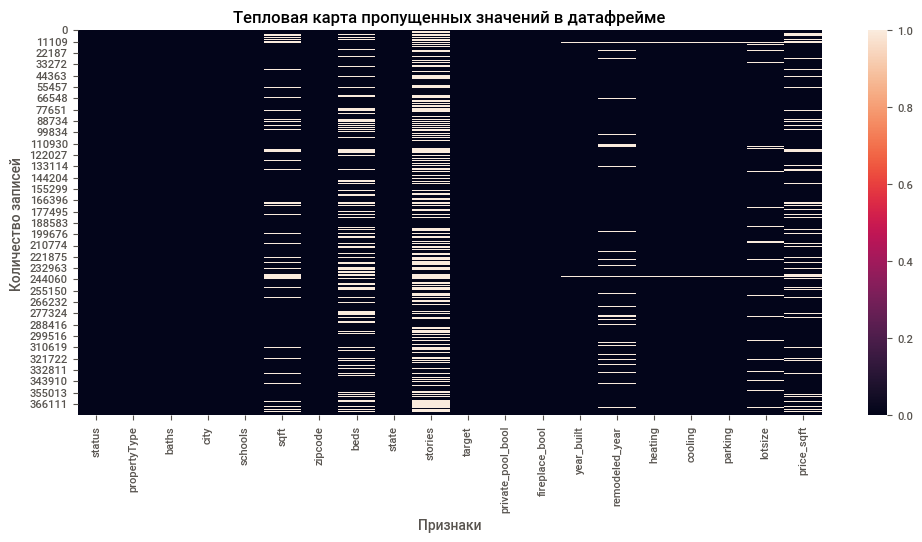

In [26]:
# Визуализируем пропуски в обновленном датафрейме
plt.figure(figsize = (12,5))
heatmap = sns.heatmap(data = df.isnull())

heatmap.set_title('Тепловая карта пропущенных значений в датафрейме');
heatmap.set_xlabel('Признаки');
heatmap.set_ylabel('Количество записей');

По тепловой карте видно, что в новых признаках есть пропуски, их также необходимо обработать.

Признаки **'year_built'** и **'remodeled_year'**

In [27]:
# Определим количество пропусков признаках
year_b_na = df['year_built'].isna().sum()
year_b_na += df[df['year_built'] == ''].shape[0]
year_b_na_percent = round(year_b_na / df.shape[0] * 100, 2)

year_r_na = df['remodeled_year'].isna().sum()
year_r_na += df[df['remodeled_year'] == ''].shape[0]
year_r_na_percent = round(year_r_na / df.shape[0] * 100, 2)

print(f'Количество пустых значений в year_built - {year_b_na}, что составляет {year_b_na_percent}%.')
print(f'Количество пустых значений в remodeled_year - {year_r_na}, что составляет {year_r_na_percent}%.')

Количество пустых значений в year_built - 62054, что составляет 16.56%.
Количество пустых значений в remodeled_year - 224822, что составляет 60.01%.


Пропусков в признаке **'remodeled_year'** очень много, можно попробовать объединить 2 признака, тем самым уменьшив суммарное количество пропусков и получить новый признак строительства/модернизации объекта недвижимости.

In [28]:
# Функция объединения признаков year_built и remodeled_year
def combine_year(year_b, year_r):
    
    if (year_b == np.NaN) or (year_b == None) or (year_b == '') : # если в year_b не указан год
        if (year_r is np.NaN) or (year_r == None) or (year_r == ''): # и в year_r не указан год
            result = None # то возвращаем None
        elif year_r.isdigit(): # если в year_r указан год
            result = year_r # то возвращаем year_r
        else:
            result = None # иначе возвращаем None
    elif year_b.isdigit(): # если в year_b указан год
        if (year_r == np.NaN) or (year_r == None) or (year_r == ''): # а в year_r год не указан
            result = year_b # то возвращаем year_b
        elif year_r.isdigit(): # если в year_r указан год
            if int(year_b) >= int(year_r): # сравниваем year_b и year_r, если year_b не меньше year_r
                result = year_b # то возвращаем year_b
            else:
                result = year_r # иначе возвращаем year_r
        else:
            result = year_b # если year_r и не None, и не год, то возвращаем year_b
    else:
        result = None # если year_b b year_r не год и не None, то возвращаем None

    return result

# Создадим новый признак из двух
df['last_renovation_year'] = df[['year_built', 'remodeled_year']].apply(lambda x: combine_year(*x), axis=1)



In [29]:
# Проверяем количество пропусков в новом признаке
year_last_na = df['last_renovation_year'].isna().sum()
year_last_na += df[df['last_renovation_year'] == ''].shape[0]
year_last_na_percent = round(year_b_na / df.shape[0] * 100, 2)

print(f'Количество пустых значений в last_renovation_year - {year_last_na}, что составляет {year_last_na_percent}%.')

Количество пустых значений в last_renovation_year - 61829, что составляет 16.56%.


Как видно, количество пропусков в итоговом признаке уменьшилось незначительно. Заполним пропуски в признаке, используя медианные значения для каждого из типов объектов недвижимости.

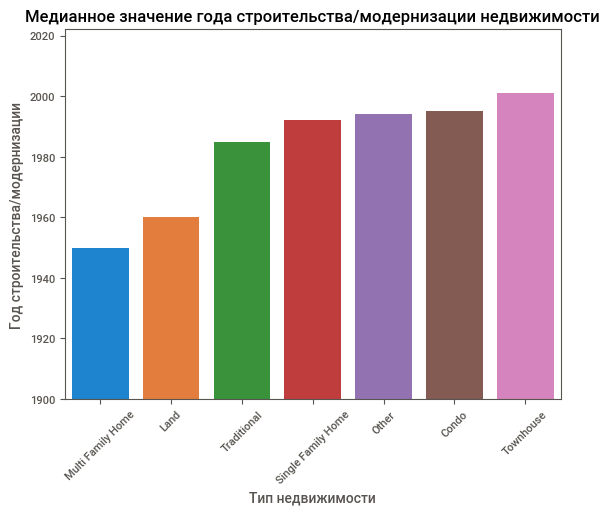

In [30]:
# Вычислим медианное значение года строительства/модернизации для разных типов недвижимости
median_year = df.groupby('propertyType')['last_renovation_year'].median().sort_values()

# Отобразим медианы в виде диаграммы
barplot = sns.barplot(
    data = median_year.to_frame().reset_index(),
    y = 'last_renovation_year',
    x = 'propertyType'
);
barplot.set_title('Медианное значение года строительства/модернизации недвижимости');
barplot.set_xlabel('Тип недвижимости');
barplot.set_ylabel('Год строительства/модернизации');
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45);
barplot.set(ylim=(1900,2022));

In [31]:
# Заполняем пропуски медианой
for el in median_year.index:
    mask1 = df['propertyType'] == el # маска по типу недвижимости
    mask2 = df['last_renovation_year'].isna() == True # маска по пропускам в last_renovation_year
    ind = df[mask1 & mask2]['last_renovation_year'].index # сохраняем индекс
    df.loc[ind, 'last_renovation_year'] = median_year[el] # приcваиваем медиану

# Приводим к типу int
df['last_renovation_year'] = np.int64(df['last_renovation_year'])

# Проверяем, что все пропуски заполнены
print('Осталось пропусков в признаке last_renovation_year:', df['last_renovation_year'].isna().sum())

Осталось пропусков в признаке last_renovation_year: 0


In [32]:
# Удаляем обработанные признаки
df.drop(['year_built', 'remodeled_year'], axis=1, inplace=True)

Признаки **'heating'**, **'cooling'**, **'parking'**. Наличие отопления, кондиционирования и паркинга могут влиять на стоимость недвижимости, поэтому преобразуем данные признаки. Пропуски будем считать за отсутствие соответствующей категории.

In [33]:
# Посмотрим данные столбца 'heating'
display(df['heating'].str.lower().value_counts()[:20])

# Проверим % пропущенных значений
heating_null = df['heating'].isnull().mean()*100
display(f'Количество пропущенных значений: {heating_null:.2f} %')

forced air                     133475
                               105127
other                           29064
electric                        10176
gas                              9266
heat pump                        8806
no data                          8415
central air                      7814
central electric                 7112
central                          6245
central, electric                4252
baseboard                        3771
wall                             3277
electric heat                    3064
heating system                   2709
forced air, heat pump            1764
radiant                          1481
central air, ceiling fan(s)      1431
natural gas heat                 1383
central furnace                  1036
Name: heating, dtype: int64

'Количество пропущенных значений: 0.93 %'

In [34]:
# Удалим лишние кавычки
df['heating'] = df['heating'].str.replace("'",'', regex=True)

# Заменяем значения столбца на True/False
df['heating_bool'] = df['heating'].apply(lambda x: True if str(x).lower() not in ['', 'no data', '0', 'not applicable', 'no', 'not', 'none'] else False)

# Удаляем обработанный столбец
df.drop('heating', axis=1, inplace=True)

# Выводим уникальные значения в новом столбце
display(df['heating_bool'].value_counts())

True     257560
False    117095
Name: heating_bool, dtype: int64

In [35]:
# Посмотрим данные столбца 'cooling'
display(df['cooling'].str.lower().value_counts()[:20])

# Проверим % пропущенных значений
cooling_null = df['cooling'].isnull().mean()*100
display(f'Количество пропущенных значений: {cooling_null:.2f} %')

central                                            157628
                                                   119552
central air                                         14382
no data                                             10395
has cooling                                          9729
none                                                 7291
central electric                                     6154
wall                                                 3983
central gas                                          3573
central heating                                      2807
cooling system                                       2700
central a/c                                          2051
other                                                1792
central a/c (electric), central heat (gas)           1646
central a/c (electric), central heat (electric)      1429
refrigeration                                        1061
central, electric                                    1059
electric      

'Количество пропущенных значений: 0.93 %'

In [36]:
# Удалим лишние кавычки
df['cooling'] = df['cooling'].str.replace("'",'', regex=True)

# Заменяем значения столбца на True/False
df['cooling_bool'] = df['cooling'].apply(lambda x: True if str(x).lower() not in ['', 'no data', '0', 'not applicable', 'no', 'not', 'none'] else False)

# Удаляем обработанный столбец
df.drop('cooling', axis=1, inplace=True)

# Выводим уникальные значения в новом столбце
display(df['cooling_bool'].value_counts())

True     233932
False    140723
Name: cooling_bool, dtype: int64

In [37]:
# Посмотрим данные столбца 'parking'
display(df['parking'].str.lower().value_counts()[:20])

# Проверим % пропущенных значений
parking_null = df['parking'].isnull().mean()*100
display(f'Количество пропущенных значений: {parking_null:.2f} %')

                                    170991
attached garage                      70240
2 spaces                             27865
1 space                              14109
detached garage                      13093
no data                              13022
carport                               7664
off street                            5240
3 spaces                              4702
carport, attached garage              3006
1                                     2928
4 spaces                              2900
2                                     2745
none                                  2345
on street                             1697
attached garage, detached garage      1334
0                                     1114
attached garage, carport               987
parking desc                           900
6 spaces                               748
Name: parking, dtype: int64

'Количество пропущенных значений: 0.93 %'

In [38]:
# Удалим лишние кавычки
df['parking'] = df['parking'].str.replace("'",'', regex=True)

# Заменяем значения столбца на True/False
df['parking_bool'] = df['parking'].apply(lambda x: True if str(x).lower() not in ['', 'no data', '0', 'not applicable', 'no', 'not', 'none'] else False)

# Удаляем обработанный столбец
df.drop('parking', axis=1, inplace=True)

# Выводим уникальные значения в новом столбце
display(df['parking_bool'].value_counts())

False    190966
True     183689
Name: parking_bool, dtype: int64

Признак **'lotsize'** показывает размер участка, на котором находится недвижимость. Большое количество пропусков и отсутствующих значений не позволяют использовать признак для предсказания.

In [39]:
# Посмотрим данные столбца 'parking'
display(df['lotsize'].str.lower().value_counts(normalize=True)[:10]*100)

# Проверим % пропущенных значений
lotsize_null = df['lotsize'].isnull().mean()*100
display(f'Количество пропущенных значений: {lotsize_null:.2f} %')

               9.483537
—              7.268518
no data        1.528346
-- sqft lot    1.100582
0.26 acres     0.897669
0.25 acres     0.779615
0.28 acres     0.750751
0.27 acres     0.706878
0.29 acres     0.672819
0.34 acres     0.556208
Name: lotsize, dtype: float64

'Количество пропущенных значений: 7.53 %'

In [40]:
# Удаляем столбец
df.drop('lotsize', axis=1, inplace=True)

Признак **'price_sqft'** показывает цену за квадратный фут. Т.к. данный признак может иметь зависимость с целевым признаком **'target'** целесообразно удалить его во избежание утечки данных.

In [41]:
# Удаляем столбец
df.drop('price_sqft', axis=1, inplace=True)

Признак **'city'** содержит 34 пропуска, а также значения, которые не идентифицированы. Т.к. количество таких строк очень мало, целесообразно избавиться от них.

In [42]:
# Приводим к нижему регистру
df['city'] = df['city'].str.lower()

df['city'].value_counts().sort_index().head(10)

             20
--            9
abilene     134
abingdon    116
accokeek      3
adams         4
addison      25
adel         13
adelphi       6
advance       3
Name: city, dtype: int64

In [43]:
# Удалим приставку Сity в названии городов
df['city'] = df['city'].str.replace(' City', '')

# Сохраним исходное количество строк
row_count_before = df.shape[0]

# Удалим строки без указания города
df = df[~df['city'].isin([' ', '--', np.nan])]

# Посчитаем количество удаленных строк
deleted_rows = row_count_before - df.shape[0]

display(f"Количество удаленных строк: {deleted_rows}")

'Количество удаленных строк: 63'

In [44]:
# Проверим % пропущенных значений
city_null = df['city'].isnull().mean()*100
display(f'Количество пропущенных значений: {city_null:.2f} %')

'Количество пропущенных значений: 0.00 %'

Признак **'schools'** представляет собой словари, содержащие информацию о рейтинге, расстоянии до школы, названии и классах. Извлечем информацию о рейтинге и расстоянии для нашей модели.

In [45]:
# Проверим содержимое словаря
df['schools'].unique()[:5]

array(['[{\'rating\': [\'4\', \'4\', \'7\', \'NR\', \'4\', \'7\', \'NR\', \'NR\'], \'data\': {\'Distance\': [\'2.7 mi\', \'3.6 mi\', \'5.1 mi\', \'4.0 mi\', \'10.5 mi\', \'12.6 mi\', \'2.7 mi\', \'3.1 mi\'], \'Grades\': [\'3–5\', \'6–8\', \'9–12\', \'PK–2\', \'6–8\', \'9–12\', \'PK–5\', \'K–12\']}, \'name\': [\'Southern Pines Elementary School\', \'Southern Middle School\', \'Pinecrest High School\', \'Southern Pines Primary School\', "Crain\'s Creek Middle School", \'Union Pines High School\', \'Episcopal Day Private School\', \'Calvary Christian Private School\']}]',
       "[{'rating': ['4/10', 'None/10', '4/10'], 'data': {'Distance': ['1.65mi', '1.32mi', '1.01mi'], 'Grades': ['9-12', '3-8', 'PK-8']}, 'name': ['East Valley High School&Extension', 'Eastvalley Middle School', 'Trentwood Elementary School']}]",
       "[{'rating': ['8/10', '4/10', '8/10'], 'data': {'Distance': ['1.19mi', '2.06mi', '2.63mi'], 'Grades': ['6-8', 'K-5', '9-12']}, 'name': ['Paul Revere Middle School', 'Bren

In [46]:
# Рассчитаем средний рейтинг
def rating_calc(rating):
    rating = rating[0].replace('/10', '')
    find_numbers = [float(el) for el in rating if el.isdigit()]
    rating_avg = np.average(find_numbers) if find_numbers else -1
    return round(rating_avg, 1)

school_rating = (df['schools'].str.findall(r"\brating': ([\s\S]+?), 'data\b").apply(lambda x: rating_calc(x)))

# Создание нового признака school_rating
df['school_rating'] = school_rating

In [47]:
# Рассчитаем минимальное расстояние до школы
min_distance = df['schools'].str.findall(r"\bDistance': ([\s\S]+?), 'Grades\b")
# Выбираем первый элемент из каждого списка
min_distance = min_distance.apply(lambda x: x[0])
# Удаляем буквенные символы из каждой строки
min_distance = min_distance.str.replace('[a-zA-Z]','', regex=True)
# Ищем все числа в каждой строке
min_distance = min_distance.str.findall(r'\b([0-9]+.[0-9]+)')
# Преобразуем в float
min_distance = min_distance.apply(lambda x: [float(i) for i in x])
# Находим минимальное расстояние. Если список пустой, то -1 
school_distance = min_distance.apply(lambda x: -1 if len(x)==0 else min(x))

# Создаем признак school_distance
df['school_distance'] = school_distance

# Удаляем отработанный столбец
df.drop(['schools'], axis=1, inplace=True)

Признак **'sqft'** показывает значение площади объекта недвижимости и содержит 11% пропусков. Заменим пропуски медианными значениями для каждого типа недвижимости.

In [48]:
# Функция для выделения площади жилья
def sqft_value(arg):
    if (arg is np.NaN) or (arg is None):
        result = np.NaN  # если строка пустая, сохраним NaN
    else:
        result = re.findall(r'(\d+)', arg) # выделяем квадратные футы
        if len(result) > 0:
            result = result[0] # если они найдены, сохраняем их
        else:
            result = np.NaN # если не найдены, вернем NaN

    # Возвращаем результат в виде float
    return result

In [49]:
# Избавимся от запятых, отделяющих тысячные разряды
df['sqft'] = df['sqft'].str.replace(',', '')

# Воспользуемся функцией, чтобы выделить квадратные футы
df['sqft'] = df['sqft'].apply(sqft_value).astype(float)

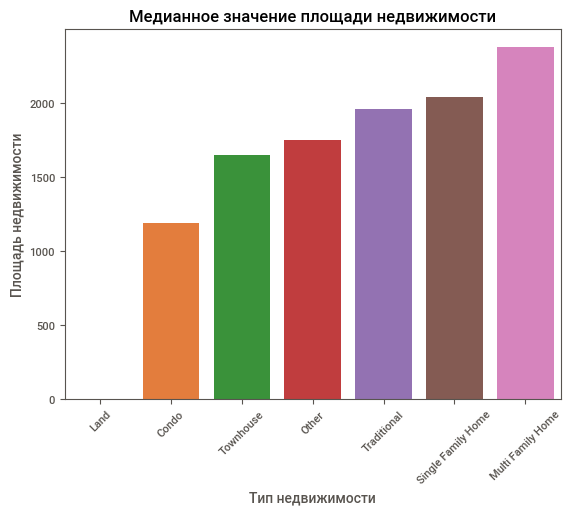

In [50]:
# Вычислим медианное значение площади для разных типов недвижимости
median_sqft = df.groupby('propertyType')['sqft'].median().sort_values()

# Отобразим медианы в виде диаграммы
barplot = sns.barplot(
    data = median_sqft.to_frame().reset_index(),
    y = 'sqft',
    x = 'propertyType'
);
barplot.set_title('Медианное значение площади недвижимости');
barplot.set_xlabel('Тип недвижимости');
barplot.set_ylabel('Площадь недвижимости');
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45);

In [51]:
# Заполняем пропуски медианой
for el in median_sqft.index:
    mask1 = df['propertyType'] == el # маска по типу недвижимости
    mask2 = df['sqft'].isna() == True # маска по пропускам в sqft
    ind = df[mask1 & mask2]['sqft'].index # сохраняем индекс
    df.loc[ind, 'sqft'] = median_sqft[el] # приcваиваем медиану

# Проверяем, что все пропуски заполнены
print('Осталось пропусков в признаке sqft:', df['sqft'].isna().sum())

Осталось пропусков в признаке sqft: 0


Признак **'zipcode'** не содержит пропусков, однако также нуждается в очистке от некорректных значений.

In [52]:
# Посмотрим данные столбца 'zipcode'
display(df['zipcode'].sort_values().unique()[:40])

array(['--', '0', '00000', '02108', '02109', '02110', '02111', '02113',
       '02114', '02115', '02116', '02118', '02119', '02120', '02121',
       '02122', '02124', '02125', '02126', '02127', '02128', '02129',
       '02130', '02131', '02132', '02134', '02135', '02136', '02199',
       '02210', '02215', '02467', '04666', '04901', '04937', '04957',
       '04963', '05345', '05441', '05441-4400'], dtype=object)

In [53]:
# Фильтр по некорректным значениям
zipcode_mask = df[(df['zipcode']=='--') | (df['zipcode']=='0')| (df['zipcode']=='00000')].index

# Удалим строки
df = df.drop(zipcode_mask)

# Отбросим часть индекса после дефиса
df['zipcode'] = df['zipcode'].str.replace("-.+",'', regex=True)

In [54]:
# Проверка данных
display(df['zipcode'].sort_values().unique()[:40])

# Проверка пропусков
print('Количество пропусков в признаке zipcode:', df['zipcode'].isna().sum())

array(['02108', '02109', '02110', '02111', '02113', '02114', '02115',
       '02116', '02118', '02119', '02120', '02121', '02122', '02124',
       '02125', '02126', '02127', '02128', '02129', '02130', '02131',
       '02132', '02134', '02135', '02136', '02199', '02210', '02215',
       '02467', '04666', '04901', '04937', '04957', '04963', '05345',
       '05441', '05443', '05444', '05445', '05448'], dtype=object)

Количество пропусков в признаке zipcode: 0


Признак **'beds'** показывает количество спален в объекте недвижимости и содержит 24% пропусков. Заменим пропуски медианными значениями для каждого типа недвижимости.

In [55]:
# Функция для определения количества спален
def count_beds(arg):
    if arg is np.NaN:
        result = np.NaN  # если строка пустая, присвоим NaN
    elif arg.isdigit():
        result = arg # если в строке число спален без точки, оставляем значение
    else:
        result = re.findall(r'(\d+)\s+[Bb]ed', arg) # извлекаем число спален из формата ХХ Beds
        if len(result) > 0:
            result = result[0]
        else:
            result = re.findall(r'(\d+)\.*\d*\s+bd', arg) # извлекаем число спален из формата Х.Х bd
            if len(result) > 0:
                result = result[0]
            else:
                result = re.findall(r'(\d+)\.', arg) # извлекаем число спален из формата ХХ.Х
                if len(result) > 0:
                    result = result[0]
                else:
                    result = np.NaN # если текст без указания количества, то присвиваем NaN

    # Возвращаем число спален в формате float
    return float(result)

# Применяем написанную функцию для выделения числа спален
df['beds'] = df['beds'].apply(count_beds)

# Проверяем долю пустых значений
print('Доля пустых значений в признаке beds: {:2.2%}'.format(df['beds'].isna().sum()/df.shape[0]))

Доля пустых значений в признаке beds: 29.25%


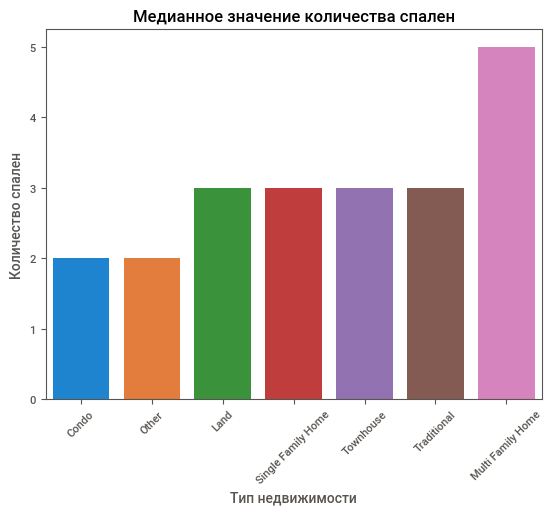

In [56]:
# Вычислим медианное количество спален для разных типов недвижимости
median_beds = df.groupby('propertyType')['beds'].median().sort_values()

# Отобразим медианы в виде диаграммы
barplot = sns.barplot(
    data = median_beds.to_frame().reset_index(),
    y = 'beds',
    x = 'propertyType'
);
barplot.set_title('Медианное значение количества спален');
barplot.set_xlabel('Тип недвижимости');
barplot.set_ylabel('Количество спален');
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45);

In [57]:
# Заполняем пропуски медианой
for el in median_beds.index:
    mask1 = df['propertyType'] == el # маска по типу недвижимости
    mask2 = df['beds'].isna() == True # маска по пропускам в beds
    ind = df[mask1 & mask2]['beds'].index # сохраняем индекс
    df.loc[ind, 'beds'] = median_beds[el] # приcваиваем медиану

# приводим к типу int
df['beds'] = df['beds'].astype(int)

# Проверяем, что все пропуски заполнены
print('Осталось пропусков в признаке beds:', df['beds'].isna().sum())

Осталось пропусков в признаке beds: 0


Признак **'state'** не содержит пропусков, все значения указаны в едином формате, следовательно предобработка не требуется.

In [58]:
df['state'].unique()

array(['NC', 'WA', 'CA', 'TX', 'FL', 'PA', 'TN', 'IA', 'NY', 'OR', 'DC',
       'NV', 'AZ', 'GA', 'IL', 'NJ', 'MA', 'OH', 'IN', 'UT', 'MI', 'VT',
       'MD', 'CO', 'VA', 'KY', 'MO', 'WI', 'ME', 'MS', 'OK', 'SC', 'MT',
       'DE', 'Fl', 'AL', 'OT'], dtype=object)

Признак **'stories'** показывает количество этажей объекта недвижимости и содержит 40% пропусков. Заменим пропуски медианными значениями для каждого типа недвижимости.

In [59]:
# Функция для определения числа этажей
def count_stories(arg):
    if arg is np.NaN:
        result = np.NaN  # если строка пустая, присваиваем NaN
    elif arg.isdigit():
        result = arg # если в строке число этажей без точки, оставляем значение    
    else:
        result = re.findall(r'(\w+)\+*\s[Sstor]', arg) # выделяем число этажей из строки со словом Stor
        if len(result) > 0:
            result = result[0] # если этаж был во входной строке, сохраняем его в формате строки
        else:
            result = re.findall(r'(\d+)\.', arg) # извлекаем число этажей из формата Х.Х
            if len(result) > 0:
                result = result[0] # если этаж был во входной строке, сохраняем его в виде числа
            else:
                result = np.NaN # если этажа не было, вернем NaN

    # Возвращаем результат в виде строки или float, если это NaN
    return result

# Применяем написанную функцию для выделения числа этажей
df['stories'] = df['stories'].apply(count_stories)

# Проверяем долю пустых значений
print('Доля пустых значений в признаке stories: {:2.2%}'.format(df['stories'].isna().sum()/df.shape[0]))

Доля пустых значений в признаке stories: 43.45%


In [60]:
# Проверяем полученные значения
df['stories'].unique()

# Производим замену строковых значений на числовые
df['stories'] = df['stories'].replace(['One'], 1)
df['stories'] = df['stories'].replace(['Two'], 2)
df['stories'] = df['stories'].replace(['Three', 'More'], 3)
df['stories'] = df['stories'].replace(['Dwelling', 'Manufactured', 'Other'], np.NaN)

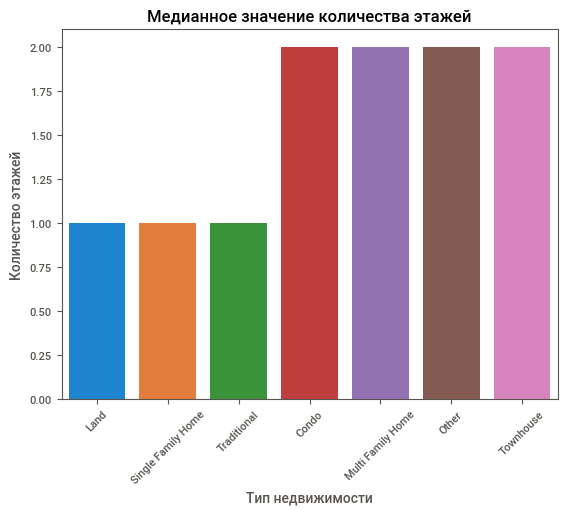

In [61]:
# Вычислим медианное количество спален для разных типов недвижимости
median_stories = df.groupby('propertyType')['stories'].median().sort_values()

# Отобразим медианы в виде диаграммы
barplot = sns.barplot(
    data = median_stories.to_frame().reset_index(),
    y = 'stories',
    x = 'propertyType'
);
barplot.set_title('Медианное значение количества этажей');
barplot.set_xlabel('Тип недвижимости');
barplot.set_ylabel('Количество этажей');
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45);

In [62]:
# Заполняем пропуски медианой
for el in median_stories.index:
    mask1 = df['propertyType'] == el # маска по типу недвижимости
    mask2 = df['stories'].isna() == True # маска по пропускам в stories
    ind = df[mask1 & mask2]['stories'].index # сохраняем индекс
    df.loc[ind, 'stories'] = median_stories[el] # приcваиваем медиану

# Приводим к типу int
df['stories'] = df['stories'].astype(int)

# Проверяем, что все пропуски заполнены
print('Осталось пропусков в признаке stories:', df['stories'].isna().sum())

Осталось пропусков в признаке stories: 0


In [63]:
df['stories'] = df['stories'].astype(int)
df['stories'].unique()

array([   1,    2,    3,    4,    0,    9,   14,    5,    7,   15,   22,
          6,   54,   23,    8,   16,   18,   21,   12,   11,   28,   17,
         63,   27,   19,   20,   13,   51,   31,   46,   70,   25,   33,
         10,   95,   90,   91,   35,   24,   38,   26,   30,   36,   42,
         45,   29,   55,   78,   56,   47,   40,   43,   80,   34,   32,
         57,   41,   39,   64,   48,   58,   52,   37,   50,   44,   68,
         60,   77,   75,   66,   62,   82,   49, 1120, 1002,   96,   65])

In [64]:
# Проверяем признаки
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374586 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   status                374586 non-null  object 
 1   propertyType          374586 non-null  object 
 2   baths                 374586 non-null  int32  
 3   city                  374586 non-null  object 
 4   sqft                  374586 non-null  float64
 5   zipcode               374586 non-null  object 
 6   beds                  374586 non-null  int32  
 7   state                 374586 non-null  object 
 8   stories               374586 non-null  int32  
 9   target                374586 non-null  object 
 10  private_pool_bool     374586 non-null  bool   
 11  fireplace_bool        374586 non-null  bool   
 12  last_renovation_year  374586 non-null  int64  
 13  heating_bool          374586 non-null  bool   
 14  cooling_bool          374586 non-null  bool   
 15  

Целевой признак **'target'** необходимо очистить от символов и привести к числовому выражению.

In [65]:
# Проверяем значения
df['target'].unique()[:20]

array(['$418,000', '$310,000', '$2,895,000', '$2,395,000', '$5,000',
       '$209,000', '181,500', '68,000', '$244,900', '$311,995',
       '$669,000', '260,000', '$525,000', '$499,900', '$168,800',
       '1,650,000', '335,000', '2,650,000', '$365,000', '$626,000'],
      dtype=object)

In [66]:
# Очищаем признак target
df['target'] = df['target'].str.replace('$', '', regex=False)
df['target'] = df['target'].str.replace(',', '', regex=False)
df['target'] = df['target'].str.replace('+', '', regex=False)

Целевой признак содержит значения стоимости недвижимости за месяц (/mo), что указывает не на продажу, а на аренду. Данные строки не могут быть использованы для нашей модели прогнозирования, следовательно подлежат удалению.

In [67]:
# Проверка наличия объектов с помесячной стоимостью
df[df.target.str.contains('/mo',regex=True)].head()

,status,propertyType,baths,city,sqft,zipcode,beds,state,stories,target,private_pool_bool,fireplace_bool,last_renovation_year,heating_bool,cooling_bool,parking_bool,school_rating,school_distance
547,Other,Single Family Home,3,chicago,3300.0,60618,4,IL,1,5500/mo,False,True,1913,True,False,True,2.3,0.13
609,Other,Multi Family Home,2,boston,1673.0,2116,2,MA,2,10500/mo,False,True,1985,False,False,False,-1.0,-1.00
2075,Other,Single Family Home,4,fort lauderdale,2400.0,33308,4,FL,1,6390/mo,True,False,1965,False,False,False,4.0,1.19
3025,Other,Multi Family Home,2,clarksville,1280.0,37040,2,TN,2,1200/mo,False,False,2014,True,False,False,8.0,0.68
3645,Other,Multi Family Home,2,chicago,1473.0,60611,2,IL,2,3600/mo,True,False,2003,False,False,True,5.5,0.72


In [68]:
# Определяем количество строк с помесячной стоимостью
rent_objects = df['target'].str.contains('/mo',regex=True).sum()
display(f'Количество строк с помесячной стоимостью: {rent_objects}')

# Определяем % строк с помесячной стоимостью
display('{}% строк содержат стоимость недвижимости за месяц'.format(round(rent_objects/df.shape[0]*100, 2)))

'Количество строк с помесячной стоимостью: 398'

'0.11% строк содержат стоимость недвижимости за месяц'

In [69]:
# Удаляем найденные строки
df = df[~df['target'].str.contains('/mo', regex=True)]

# Приводим значения к типу int
df['target'] = df['target'].astype(int)

In [70]:
# Проверяем наличие пропусков в признаках
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374188 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   status                374188 non-null  object 
 1   propertyType          374188 non-null  object 
 2   baths                 374188 non-null  int32  
 3   city                  374188 non-null  object 
 4   sqft                  374188 non-null  float64
 5   zipcode               374188 non-null  object 
 6   beds                  374188 non-null  int32  
 7   state                 374188 non-null  object 
 8   stories               374188 non-null  int32  
 9   target                374188 non-null  int32  
 10  private_pool_bool     374188 non-null  bool   
 11  fireplace_bool        374188 non-null  bool   
 12  last_renovation_year  374188 non-null  int64  
 13  heating_bool          374188 non-null  bool   
 14  cooling_bool          374188 non-null  bool   
 15  

In [71]:
# После предварительной очистки повторно произведем поиск и удаление полных дубликатов
mask = df.duplicated()
df_duplicates = df[mask]
display(f"Количество полных дубликтов в таблице составляет: {df_duplicates.shape[0]}")
df.drop_duplicates(inplace=True)
df.shape

'Количество полных дубликтов в таблице составляет: 5219'

(368969, 18)

Пропусков и дубликатов в признаках не осталось. Таким образом, можно переходить дальнейшей обработке данных на этапе разведывательного анализа. 

In [72]:
# Cохраняем обработанные данные в CSV-файл
df.to_csv("data/data_cleaned.csv", index=False)